A group of notebooks to load the CMS 2008-2010 Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF).

https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html


The DE-SynPUF was created with the goal of providing a realistic set of claims data in the public domain while providing the very highest degree of protection to the Medicare beneficiaries’ protected health information.  The purposes of the DE-SynPUF are to:

1. allow data entrepreneurs to develop and create software and applications that may eventually be applied to actual CMS claims data;
2. train researchers on the use and complexity of conducting analyses with CMS claims data prior to initiating the process to obtain access to actual CMS data; and,
3. support safe data mining innovations that may reveal unanticipated knowledge gains while preserving beneficiary privacy.

The files have been designed so that programs and procedures created on the DE-SynPUF will function on CMS Limited Data Sets. The data structure of the Medicare DE-SynPUF is very similar to the CMS Limited Data Sets, but with a smaller number of variables.  The DE-SynPUF also provides a robust set of metadata on the CMS claims data that have not been previously available in the public domain.  Although the DE-SynPUF has very limited inferential research value to draw conclusions about Medicare beneficiaries due to the synthetic processes used to create the file, the Medicare DE-SynPUF does increase access to a realistic Medicare claims data file in a timely and less expensive manner to spur the innovation necessary to achieve the goals of better care for beneficiaries and improve the health of the population.

The DE-SynPUF contains five types of data – Beneficiary Summary, Inpatient Claims, Outpatient Claims, Carrier Claims, and Prescription Drug Events.

| DE-SynPUF | Unit of record | Number of Records 2008 | Number of Records 2009 | Number of Records 2010 |
| ----------|:---------------:|:---------------------:|:-----------------------:|:----------------------:|
| Beneficiary Summary | Beneficiary | 2,326,856 | 2,291,320 | 2,255,098 |
| Inpatient Claims | claim | 547,800 | 504,941 | 280,081 |
| Outpatient Claims | claim | 5,673,808 | 6,519,340 | 3,633,839 | 
| Carrier Claims | claim | 34,276,324 | 37,304,933 | 23,282,135 | 
| Prescription Drug Events (PDE) | event | 39,927,827 | 43,379,293 | 27,779,849 | 



### Accessing the files

Due to file size limitations, each data type in the CMS Linkable 2008-2010 Medicare DE-SynPUF is released in 20 separate samples (essentially each is a .25% sample).  All claims for a particular beneficiary are in samples with the same number (i.e. all beneficiaries in sample 1 have all their claims in the sample 1 files).  This design allows DE-SynPUF users who do not need the entire synthetic population of the DE-SynPUF to read in only as many samples as they desire.  

A unique cryptographic identifier, DESYNPUF_ID, identifying beneficiaries was provided in each CMS linkable 2008-2010 Medicare DE-SynPUF. DE-SynPUF users can link CMS Linkable 2008-2010 Medicare DE-SynPUFs using this Beneficiary Code, DESYNPUF_ID, as the linking key. However, DESYNPUF_ID was specifically created for DE-SynPUFs and carries no information about the patient or any patient records, and is provided solely for reference and data processing purposes.

#### Sample 1

Each of the 20 samples contains eight files – three beneficiary files (one for each year), one inpatient file containing three years of data, one outpatient file containing three years of data, one PDE file containing three years of data, and two carrier files containing three years of data (Carrier 1 and Carrier 2).  Because of file size limitations, a Carrier sample was split into two CSV files. Both CSV files in a sample must be downloaded.  The SAS read-in program for the Carrier files creates one SAS data set from the two CSV files in the sample.  Beneficiary data was obtained for each year that the beneficiary enrolled in Medicare.  A single Beneficiary sample contains three CSV files, one for each year.  Because beneficiary files contain time varying variables like chronic conditions, reimbursement variables, and death, three files (one for each year) were provided to keep the same variable name as in the actual data.  All three CSV files in a sample must be downloaded. The SAS read-in program for the Beneficiary files creates one SAS data set for each year within a sample. If the beneficiary dies between 2008 and 2010, the beneficiary will not have any data in years after the beneficiary’s death.

Although actual Medicare data are provided by year, De-SynPUFs provided three-year claims files to decrease the number of files users have to download and to take the advantage of multiple year data. Users can easily extract single year claims data.

Click on the file below to begin download:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime


In [2]:


def process_url(urlstring):
    """A function to turn the CMS urls pointing to zipped files
    into dataframes. Returns a dataframe"""
    import requests, zipfile, StringIO
    r = requests.get(urlstring)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    # need to tease out the appropiate part of the sample string
    df = pd.read_csv(z.open(urlstring.split('/')[-1].replace('zip','csv')))
    
    return df
    
    
    

## Collect all the zip urls for sample 1

In [3]:
sample1list = ["https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip",
              "http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1A.zip",
              "http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1B.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.zip",
              "http://downloads.cms.gov/files/DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_1.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2010_Beneficiary_Summary_File_Sample_1.zip"]

In [4]:
sample1list[0]

'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip'

In [5]:
dfplace = pd.read_pickle('dfplace.pickle')
dfplace.head()

State Abbreviation State FIPS Code County FIPS Code FIPS Entity Code  \
0                 AL              01              001            00000   
1                 AL              01              003            00000   
2                 AL              01              005            00000   
3                 AL              01              007            00000   
4                 AL              01              009            00000   

  ANSI Code  GU Name Entity Description FIPScombo            address  \
0  00161526  Autauga             County     01001  Autauga+county+AL   
1  00161527  Baldwin             County     01003  Baldwin+county+AL   
2  00161528  Barbour             County     01005  Barbour+county+AL   
3  00161529     Bibb             County     01007     Bibb+county+AL   
4  00161530   Blount             County     01009   Blount+county+AL   

              county    elevation        lat        lng  
0  Autauga+county+AL   353.019130  32.579182 -86.499655  
1  Baldwin+county+AL   144.481789  30.601074 -87.776333  
2  Barbour+county+AL   490.467758  31.817290 -85.354965  
3     Bibb+county+AL   244.550663  32.936668 -87.088890  
4   Blount+county+AL  1007.442256  34.014515 -86.499655

In [6]:
dfssa = pd.read_table('http://www.nber.org/ssa-fips-state-county-crosswalk/CBSAtoCountycrosswalk_FY13.txt',
                     dtype={'SSA State county code': object,
                           'FIPS State county code': object})

In [7]:
dfelev = pd.merge(dfssa, dfplace, left_on='FIPS State county code',
                 right_on='FIPScombo')

In [8]:
dfelev.head()

County State SSA State county code FIPS State county code  \
0  AUTAUGA    AL                 01000                  01001   
1  BALDWIN    AL                 01010                  01003   
2  BARBOUR    AL                 01020                  01005   
3     BIBB    AL                 01030                  01007   
4   BLOUNT    AL                 01040                  01009   

   CBSA (blanks are rural) CBSA name (Blanks are rural) State Abbreviation  \
0                    33860               Montgomery, AL                 AL   
1                      NaN                          NaN                 AL   
2                      NaN                          NaN                 AL   
3                    13820        Birmingham-Hoover, AL                 AL   
4                    13820        Birmingham-Hoover, AL                 AL   

  State FIPS Code County FIPS Code FIPS Entity Code ANSI Code  GU Name  \
0              01              001            00000  00161526  Autauga   
1              01              003            00000  00161527  Baldwin   
2              01              005            00000  00161528  Barbour   
3              01              007            00000  00161529     Bibb   
4              01              009            00000  00161530   Blount   

  Entity Description FIPScombo            address             county  \
0             County     01001  Autauga+county+AL  Autauga+county+AL   
1             County     01003  Baldwin+county+AL  Baldwin+county+AL   
2             County     01005  Barbour+county+AL  Barbour+county+AL   
3             County     01007     Bibb+county+AL     Bibb+county+AL   
4             County     01009   Blount+county+AL   Blount+county+AL   

     elevation        lat        lng  
0   353.019130  32.579182 -86.499655  
1   144.481789  30.601074 -87.776333  
2   490.467758  31.817290 -85.354965  
3   244.550663  32.936668 -87.088890  
4  1007.442256  34.014515 -86.499655

## First load and transform the beneficiary files

The codebook is given here
https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/SynPUF_Codebook.pdf



```DESYNPUF_ID``` is a cryptographic number provided on each file to link claims to a beneficiary. This beneficiary ID carries no information about the patient or any patient records, and is provided for reference and data processing purposes.

### Need to transform ```BENE_BIRTH_DT``` into a date

```BENE_SEX_IDENT_CD``` is 1 for males and 2 for females; get rid of the numbers and put in the strings

#### Make a function that cleans the bene dataframes:

In [9]:
def make_clean_bene(dfraw):
    """takes the raw dataframe dfraw and transform it
    using the codebook."""
    import datetime as dt
    dfraw['BENE_BIRTH_DT'] = dfraw['BENE_BIRTH_DT'].apply(lambda x: pd.to_datetime(str(x),
                    format='%Y%m%d'))
    dfraw['BENE_DEATH_DT'] = dfraw['BENE_DEATH_DT'].apply(lambda x: pd.to_datetime(str(x),
                    format='%Y%m%d'))
    dfraw.replace({'BENE_SEX_IDENT_CD':{1:'Male',
                                         2:'Female'}},
                                        inplace=True)
    dfraw.replace({'BENE_RACE_CD':{1: 'White',
                                   2:'Black',
                                   3: 'Others',
                                   5: 'Hispanic'}},
                                    inplace=True)
    dfraw.replace({'BENE_ESRD_IND':{'0':'The beneficiary does not have end stage renal disease',
                                'Y':'The beneficiary has end stage renal disease'}},
                                        inplace=True)
    dfraw['state'] = dfraw['SP_STATE_CODE'].copy()
    dfraw['state'] = dfraw['state'].apply(str)
    dfraw['state'] = dfraw['state'].apply(lambda x: x.rjust(2,'0'))
    dfraw.replace({'SP_STATE_CODE':{1: 'AL',
                                    2: 'AK',
                                    3: 'AZ',
                                    4: 'AR',
                                    5: 'CA',
                                    6: 'CO',
                                     7: 'CT',
                                    8: 'DE',
                                    9: 'DC',
                                    10: 'FL',
                                    11: 'GA',
                                    12: 'HI',
                                    13: 'ID',
                                    14: 'IL',
                                    15: 'IN',
                                    16: 'IA',
                                    17: 'KS',
                                    18: 'KY',
                                    19: 'LA',
                                    20: 'ME',
                                    21: 'MD',
                                    22: 'MA',
                                    23: 'MI',
                                    24: 'MN',
                                    25: 'MS',
                                    26: 'MO',
                                    27: 'MT',
                                    28: 'NE',
                                    29: 'NV',
                                    30: 'NH',
                                    31: 'NJ',
                                    32: 'NM',
                                    33: 'NY',
                                    34: 'NC',
                                    35: 'ND',
                                    36: 'OH',
                                    37: 'OK',
                                    38: 'OR',
                                    39: 'PA',
                                    41: 'RI',
                                    42: 'SC',
                                    43: 'SD',
                                    44: 'TN',
                                    45: 'TX',
                                    46: 'UT',
                                    47: 'VT',
                                    49: 'VA',
                                    50: 'WA',
                                    51: 'WV',
                                    52: 'WI',
                                    53: 'WY',
                                    54: 'Others'}},
                 inplace=True)
    dfraw['BENE_COUNTY_CD'] = dfraw['BENE_COUNTY_CD'].apply(str)
    dfraw['BENE_COUNTY_CD'] = dfraw['BENE_COUNTY_CD'].apply(lambda x: x.rjust(3,'0'))
    dfraw['crosswalk'] = dfraw['state'] + dfraw['BENE_COUNTY_CD']
    dfhuh = pd.merge(dfraw, dfelev, left_on='crosswalk', right_on='SSA State county code')
    dfhuh.replace({'SP_ALZHDMTA':{1:'Yes',
                                         2:'No'}},
                                        inplace=True)
    dfhuh.replace({'SP_CHF':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_CHRNKIDN':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_CNCR':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_COPD':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_DEPRESSN':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_DIABETES':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_ISCHMCHT':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_OSTEOPRS':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_CHRNKIDN':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_RA_OA':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    dfhuh.replace({'SP_STRKETIA':{1:'Yes',
                            2:'No'}},
                            inplace=True)
    return dfhuh
    

In [10]:
dfbene2008 = process_url(sample1list[0])

In [11]:
dfbene2008.columns

Index([u'DESYNPUF_ID', u'BENE_BIRTH_DT', u'BENE_DEATH_DT',
       u'BENE_SEX_IDENT_CD', u'BENE_RACE_CD', u'BENE_ESRD_IND',
       u'SP_STATE_CODE', u'BENE_COUNTY_CD', u'BENE_HI_CVRAGE_TOT_MONS',
       u'BENE_SMI_CVRAGE_TOT_MONS', u'BENE_HMO_CVRAGE_TOT_MONS',
       u'PLAN_CVRG_MOS_NUM', u'SP_ALZHDMTA', u'SP_CHF', u'SP_CHRNKIDN',
       u'SP_CNCR', u'SP_COPD', u'SP_DEPRESSN', u'SP_DIABETES', u'SP_ISCHMCHT',
       u'SP_OSTEOPRS', u'SP_RA_OA', u'SP_STRKETIA', u'MEDREIMB_IP',
       u'BENRES_IP', u'PPPYMT_IP', u'MEDREIMB_OP', u'BENRES_OP', u'PPPYMT_OP',
       u'MEDREIMB_CAR', u'BENRES_CAR', u'PPPYMT_CAR'],
      dtype='object')

In [12]:
dfbene2008 = make_clean_bene(dfbene2008)

interactive plots like mathematica: https://plot.ly/pandas/3d-scatter-plots/

In [13]:
dfbene2008.columns

Index([u'DESYNPUF_ID', u'BENE_BIRTH_DT', u'BENE_DEATH_DT',
       u'BENE_SEX_IDENT_CD', u'BENE_RACE_CD', u'BENE_ESRD_IND',
       u'SP_STATE_CODE', u'BENE_COUNTY_CD', u'BENE_HI_CVRAGE_TOT_MONS',
       u'BENE_SMI_CVRAGE_TOT_MONS', u'BENE_HMO_CVRAGE_TOT_MONS',
       u'PLAN_CVRG_MOS_NUM', u'SP_ALZHDMTA', u'SP_CHF', u'SP_CHRNKIDN',
       u'SP_CNCR', u'SP_COPD', u'SP_DEPRESSN', u'SP_DIABETES', u'SP_ISCHMCHT',
       u'SP_OSTEOPRS', u'SP_RA_OA', u'SP_STRKETIA', u'MEDREIMB_IP',
       u'BENRES_IP', u'PPPYMT_IP', u'MEDREIMB_OP', u'BENRES_OP', u'PPPYMT_OP',
       u'MEDREIMB_CAR', u'BENRES_CAR', u'PPPYMT_CAR', u'state', u'crosswalk',
       u'County', u'State', u'SSA State county code',
       u'FIPS State county code', u'CBSA (blanks are rural)',
       u'CBSA name (Blanks are rural)', u'State Abbreviation',
       u'State FIPS Code', u'County FIPS Code', u'FIPS Entity Code',
       u'ANSI Code', u'GU Name', u'Entity Description', u'FIPScombo',
       u'address', u'county', u'elevation', u'

In [14]:
dfbene2008.columns

Index([u'DESYNPUF_ID', u'BENE_BIRTH_DT', u'BENE_DEATH_DT',
       u'BENE_SEX_IDENT_CD', u'BENE_RACE_CD', u'BENE_ESRD_IND',
       u'SP_STATE_CODE', u'BENE_COUNTY_CD', u'BENE_HI_CVRAGE_TOT_MONS',
       u'BENE_SMI_CVRAGE_TOT_MONS', u'BENE_HMO_CVRAGE_TOT_MONS',
       u'PLAN_CVRG_MOS_NUM', u'SP_ALZHDMTA', u'SP_CHF', u'SP_CHRNKIDN',
       u'SP_CNCR', u'SP_COPD', u'SP_DEPRESSN', u'SP_DIABETES', u'SP_ISCHMCHT',
       u'SP_OSTEOPRS', u'SP_RA_OA', u'SP_STRKETIA', u'MEDREIMB_IP',
       u'BENRES_IP', u'PPPYMT_IP', u'MEDREIMB_OP', u'BENRES_OP', u'PPPYMT_OP',
       u'MEDREIMB_CAR', u'BENRES_CAR', u'PPPYMT_CAR', u'state', u'crosswalk',
       u'County', u'State', u'SSA State county code',
       u'FIPS State county code', u'CBSA (blanks are rural)',
       u'CBSA name (Blanks are rural)', u'State Abbreviation',
       u'State FIPS Code', u'County FIPS Code', u'FIPS Entity Code',
       u'ANSI Code', u'GU Name', u'Entity Description', u'FIPScombo',
       u'address', u'county', u'elevation', u'

C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


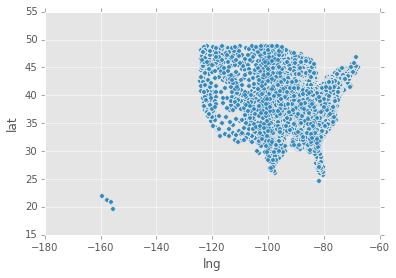

In [15]:
dfbene2008.plot.scatter('lng','lat')

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import plotly
plotly.offline.init_notebook_mode()

data = []
cluster = []
#colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(dfbene2008['State'].unique())):
    name = dfbene2008['State'].unique()[i]
    #color = colors[i]
    x = dfbene2008[ dfbene2008['State'] == name ]['lng']
    y = dfbene2008[ dfbene2008['State'] == name ]['lat']
    z = dfbene2008[ dfbene2008['State'] == name ]['elevation']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Beneficiary file',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

#py.iplot(fig, filename='pandas-3d-benefile', validate=False)

plotly.offline.iplot(fig, validate=False)


In [17]:
dfbene2008['BENE_DEATH_DT'].dt.month.value_counts().sort_index()

1     141
2     122
3     131
4     118
5     141
6     117
7     136
8     128
9     145
10    140
11    133
12    134
Name: BENE_DEATH_DT, dtype: int64

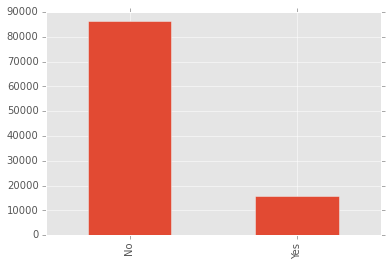

In [18]:
dfbene2008['SP_RA_OA'].value_counts().plot(kind='bar')

In [19]:
dfbene2008['SP_OSTEOPRS'].value_counts()[1]/float(dfbene2008['SP_OSTEOPRS'].value_counts()[0])

0.21273738502127254

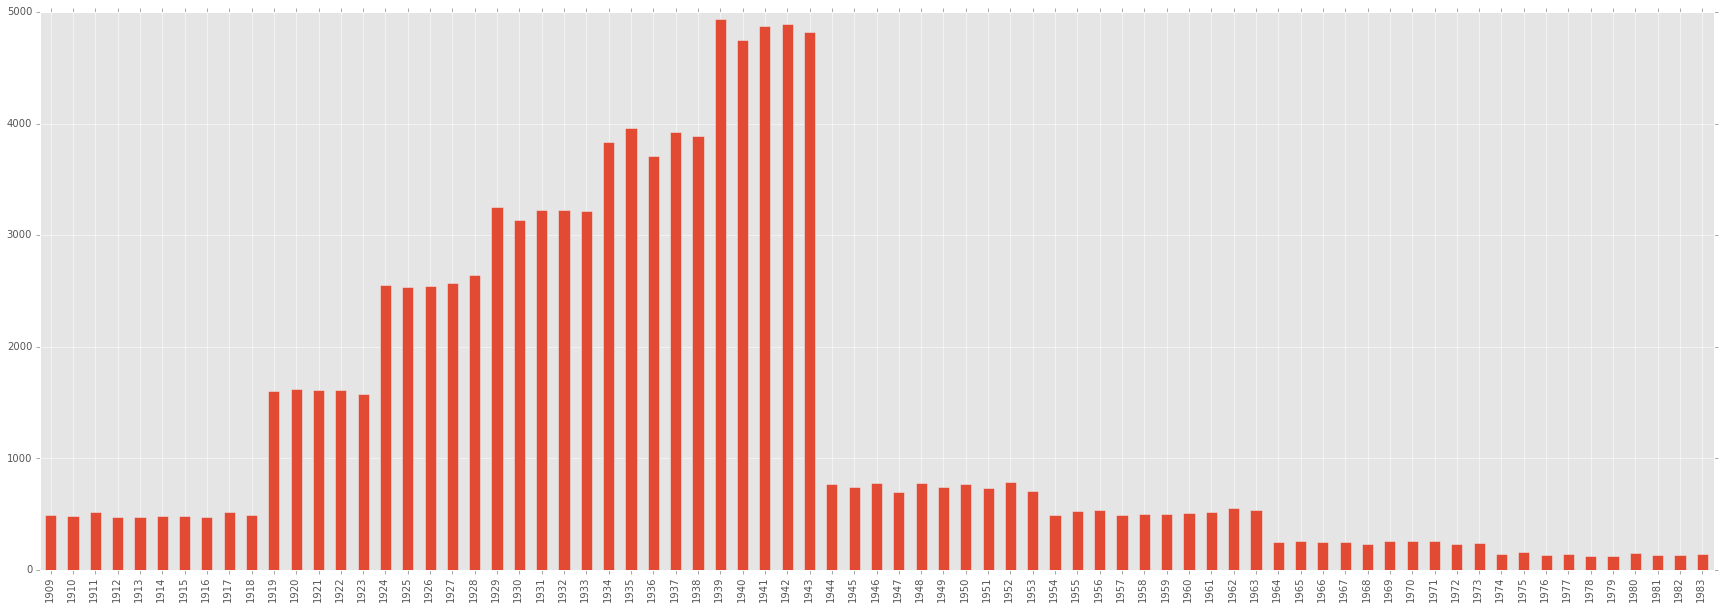

In [20]:
dfbene2008['BENE_BIRTH_DT'].dt.year.value_counts().sort_index().plot(kind='bar',figsize=(30,10))

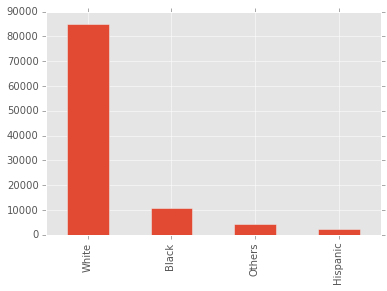

In [21]:
dfbene2008['BENE_RACE_CD'].value_counts().plot(kind='bar')

In [22]:
dfbene2008['BENE_ESRD_IND'].value_counts()

The beneficiary does not have end stage renal disease    94709
The beneficiary has end stage renal disease               7338
Name: BENE_ESRD_IND, dtype: int64

```BENE_COUNTY_CD```

Label: THIS CODE SPECIFIES THE SSA CODE FOR THE COUNTY OF RESIDENCE OF
THE BENEFICIARY. EACH STATE HAS A SERIES OF CODES BEGINNING WITH '000'
FOR EACH COUNTY WITHIN THAT STATE. CERTAIN CITIES WITHIN THAT STATE
HAVE THEIR OWN CODE. COUNTY CODES MUST BE COMBINED WITH STATE
CODES IN ORDER TO LOCATE THE SPECIFIC COUNTY. THE CODING SYSTEM IS
THE SSA SYSTEM, NOT THE FEDERAL INFORMATION PROCESSING STANDARD
(FIPS)


Use this file http://www.nber.org/ssa-fips-state-county-crosswalk/CBSAtoCountycrosswalk_FY13.txt

Need to pad ```BENE_COUNTY_CD``` with zeros on the left so that the whole thing is 3 digits long.
First turn it into a string.

In [23]:
dfbene2008['PLAN_CVRG_MOS_NUM'].value_counts()

12    54242
0     41451
11     1140
10      888
9       735
8       679
7       509
6       494
5       417
1       409
4       374
3       365
2       344
Name: PLAN_CVRG_MOS_NUM, dtype: int64

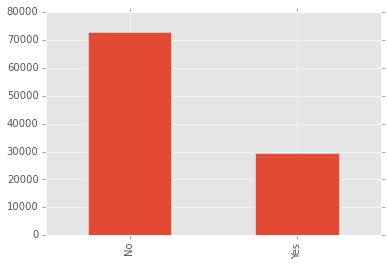

In [24]:
dfbene2008['SP_CHF'].value_counts().sort_index().plot(kind='bar')

In [25]:
sample1list

['https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip',
 'http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1A.zip',
 'http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1B.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.zip',
 'http://downloads.cms.gov/files/DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_1.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE

## Carrier Claims (Sample 1A)

In [140]:
dficd9dx = pd.read_excel('CMS32_DESC_LONG_SHORT_DX.xlsx')

In [225]:
dficd9sg = pd.read_excel('CMS32_DESC_LONG_SHORT_SG.xlsx',
                        convert_float=False,
                        converters = {'PROCEDURE CODE': str})

In [226]:
dfcarriera = process_url(sample1list[1])

In [227]:
dfparentcodes = pd.read_csv('tabula-icd-9-dx-codes.csv')

In [228]:
def icd9_description_trans(df,columnname):
    """takes the dataframe df and the columnname as a string and adds a 
    column containing the long description to df using the 
    description string in dficd9dx"""    
    dfhuh = pd.merge(df[[columnname]], dficd9dx,
                 left_on=columnname, right_on='DIAGNOSIS CODE',how='left')
    df[columnname + '_DESCRIPTION'] = dfhuh['LONG DESCRIPTION']
    del dfhuh


def make_clean_carrier(dfraw):
    """takes the raw dataframe dfraw and transform it
    using the codebook."""
    import datetime as dt
    dfraw['CLM_FROM_DT'] = dfraw['CLM_FROM_DT'].apply(lambda x: pd.to_datetime(str(x),
                    format='%Y%m%d'))
    dfraw['CLM_THRU_DT'] = dfraw['CLM_THRU_DT'].apply(lambda x: pd.to_datetime(str(x),
                    format='%Y%m%d'))
    for s in list(dfraw.columns)[4:12]:
        icd9_description_trans(dfraw,s)
        dfhuh = pd.merge(dfraw[[s,s+'_DESCRIPTION']], dfparentcodes,
                 left_on=s, right_on='Diagnosis Code',how='left')
        diagcodebad = dfhuh['Diagnosis_Description'].isnull()
        DESCRIPTIONbad = dfhuh[s+'_DESCRIPTION'].isnull()
        dfhuh['total'] = 0
        dfhuh['total'][diagcodebad] = dfhuh[s+'_DESCRIPTION'].copy()
        dfhuh['total'][DESCRIPTIONbad] = dfhuh['Diagnosis_Description'].copy()
        dfraw[s+'total_description'] = dfhuh['total']
        del dfraw[s+'_DESCRIPTION']
        del dfhuh

In [229]:
print list(dfcarriera.columns)

['DESYNPUF_ID', 'CLM_ID', 'CLM_FROM_DT', 'CLM_THRU_DT', 'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4', 'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8', 'PRF_PHYSN_NPI_1', 'PRF_PHYSN_NPI_2', 'PRF_PHYSN_NPI_3', 'PRF_PHYSN_NPI_4', 'PRF_PHYSN_NPI_5', 'PRF_PHYSN_NPI_6', 'PRF_PHYSN_NPI_7', 'PRF_PHYSN_NPI_8', 'PRF_PHYSN_NPI_9', 'PRF_PHYSN_NPI_10', 'PRF_PHYSN_NPI_11', 'PRF_PHYSN_NPI_12', 'PRF_PHYSN_NPI_13', 'TAX_NUM_1', 'TAX_NUM_2', 'TAX_NUM_3', 'TAX_NUM_4', 'TAX_NUM_5', 'TAX_NUM_6', 'TAX_NUM_7', 'TAX_NUM_8', 'TAX_NUM_9', 'TAX_NUM_10', 'TAX_NUM_11', 'TAX_NUM_12', 'TAX_NUM_13', 'HCPCS_CD_1', 'HCPCS_CD_2', 'HCPCS_CD_3', 'HCPCS_CD_4', 'HCPCS_CD_5', 'HCPCS_CD_6', 'HCPCS_CD_7', 'HCPCS_CD_8', 'HCPCS_CD_9', 'HCPCS_CD_10', 'HCPCS_CD_11', 'HCPCS_CD_12', 'HCPCS_CD_13', 'LINE_NCH_PMT_AMT_1', 'LINE_NCH_PMT_AMT_2', 'LINE_NCH_PMT_AMT_3', 'LINE_NCH_PMT_AMT_4', 'LINE_NCH_PMT_AMT_5', 'LINE_NCH_PMT_AMT_6', 'LINE_NCH_PMT_AMT_7', 'LINE_NCH_PMT_AMT_8', 'LINE_NCH_PMT_

In [230]:
make_clean_carrier(dfcarriera)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [__main__.py:26]


## updated codebook
https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/SynPUF_DUG.pdf

The first three digits of the ICD9 code variables are to the left of a decimal point, and then there is an implied missing decimal point and then all the rest.

First define a function that takes a string and retuns a new one with a decimal point in the appropriate position.

Then use the new funciton in the apply method a la 
http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

In [231]:
list(dfcarriera.columns)

['DESYNPUF_ID',
 'CLM_ID',
 'CLM_FROM_DT',
 'CLM_THRU_DT',
 'ICD9_DGNS_CD_1',
 'ICD9_DGNS_CD_2',
 'ICD9_DGNS_CD_3',
 'ICD9_DGNS_CD_4',
 'ICD9_DGNS_CD_5',
 'ICD9_DGNS_CD_6',
 'ICD9_DGNS_CD_7',
 'ICD9_DGNS_CD_8',
 'PRF_PHYSN_NPI_1',
 'PRF_PHYSN_NPI_2',
 'PRF_PHYSN_NPI_3',
 'PRF_PHYSN_NPI_4',
 'PRF_PHYSN_NPI_5',
 'PRF_PHYSN_NPI_6',
 'PRF_PHYSN_NPI_7',
 'PRF_PHYSN_NPI_8',
 'PRF_PHYSN_NPI_9',
 'PRF_PHYSN_NPI_10',
 'PRF_PHYSN_NPI_11',
 'PRF_PHYSN_NPI_12',
 'PRF_PHYSN_NPI_13',
 'TAX_NUM_1',
 'TAX_NUM_2',
 'TAX_NUM_3',
 'TAX_NUM_4',
 'TAX_NUM_5',
 'TAX_NUM_6',
 'TAX_NUM_7',
 'TAX_NUM_8',
 'TAX_NUM_9',
 'TAX_NUM_10',
 'TAX_NUM_11',
 'TAX_NUM_12',
 'TAX_NUM_13',
 'HCPCS_CD_1',
 'HCPCS_CD_2',
 'HCPCS_CD_3',
 'HCPCS_CD_4',
 'HCPCS_CD_5',
 'HCPCS_CD_6',
 'HCPCS_CD_7',
 'HCPCS_CD_8',
 'HCPCS_CD_9',
 'HCPCS_CD_10',
 'HCPCS_CD_11',
 'HCPCS_CD_12',
 'HCPCS_CD_13',
 'LINE_NCH_PMT_AMT_1',
 'LINE_NCH_PMT_AMT_2',
 'LINE_NCH_PMT_AMT_3',
 'LINE_NCH_PMT_AMT_4',
 'LINE_NCH_PMT_AMT_5',
 'LINE_NCH_PMT_AMT_6',
 '

Need to read in this pdf and scrape it:
http://www.ddas.vermont.gov/ddas-policies/policies-ddas/policies-ddas-documents/icd-9-dx-codes

It has all the "parent codes."

Use Tabula intead to extract the tables Ridiculous
http://tabula.technology/


might need to install java as well

done ; it made the file tabula-icd-9-dx-codes.csv

now read it into a pandas dataframe 


### Files of ICD9 codes are Here:

https://www.cms.gov/medicare/coding/ICD9providerdiagnosticcodes/codes.html

Version 32

https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/Downloads/ICD-9-CM-v32-master-descriptions.zip


But this guy does NOT have the '.'   What the what?

But there are TWO files, one with 4 digits  and one with five digits.  need to read them both  OK no big deal.

Need to replace the values in ```dfcarriera['ICD9_DGNS_CD_1]``` with the the values of 
```dficd9dx['LONG DESCRIPTION']``` where ```dfcarriera['ICD9_DGNS_CD_1'] == dficd9dx['DIAGNOSIS CODE']```.

Similarly for ```dfcarriera['ICD9_DGNS_CD_2']```, etc.

How to deal with the NaNs? code 414.0 does exist, but its an umbrella code for more specific subcodes:

```
ICD-9 CODE	ICD-9 CODE DESCRIPTION
414.00	CORONARY ATHEROSCLEROSIS OF UNSPECIFIED TYPE OF VESSEL NATIVE OR GRAFT
414.01	CORONARY ATHEROSCLEROSIS OF NATIVE CORONARY ARTERY
414.02	CORONARY ATHEROSCLEROSIS OF AUTOLOGOUS VEIN BYPASS GRAFT
414.03	CORONARY ATHEROSCLEROSIS OF NONAUTOLOGOUS BIOLOGICAL BYPASS GRAFT
414.04	CORONARY ATHEROSCLEROSIS OF ARTERY BYPASS GRAFT
414.05	CORONARY ATHEROSCLEROSIS OF UNSPECIFIED BYPASS GRAFT
414.06	CORONARY ATHEROSCLEROSIS OF NATIVE CORONARY ARTERY OF TRANSPLANTED HEART
414.07	CORONARY ATHEROSCLEROSIS OF BYPASS GRAFT (ARTERY) (VEIN) OF TRANSPLANTED HEART
```

OK, so the NaNs do exist, but are not found in the provided CMS lookup tables. Ridiculous. 
For example, '4140' corresponds to CORONARY ATHGEROSCLEROSIS and is in this pdf
http://www.ddas.vermont.gov/ddas-policies/policies-ddas/policies-ddas-documents/icd-9-dx-codes

First make a function to transform a single column

In [232]:
dfcarriera.head(20)

DESYNPUF_ID           CLM_ID CLM_FROM_DT CLM_THRU_DT ICD9_DGNS_CD_1  \
0   00013D2EFD8E45D1  887733386680966  2009-07-25  2009-07-25           7245   
1   00013D2EFD8E45D1  887213386947664  2009-10-14  2009-10-14           3598   
2   00013D2EFD8E45D1  887243388666441  2010-04-01  2010-04-01          29606   
3   00013D2EFD8E45D1  887893388307089  2010-08-17  2010-08-17           8410   
4   00013D2EFD8E45D1  887463387476539  2010-11-05  2010-11-05          29521   
5   00016F745862898F  887523386668713  2008-10-04  2008-10-04          82311   
6   00016F745862898F  887793388522804  2008-10-08  2008-10-08          78963   
7   00016F745862898F  887783385091632  2008-10-09  2008-10-18           2514   
8   00016F745862898F  887953385848149  2008-10-20  2008-10-20          59971   
9   00016F745862898F  887423388326030  2008-12-09  2008-12-09          87362   
10  00016F745862898F  887383388842050  2009-01-05  2009-01-05           1628   
11  00016F745862898F  887783384850257  2009-01-13  2009-01-13          V5867   
12  00016F745862898F  887293389131196  2009-01-17  2009-01-17           2723   
13  00016F745862898F  887523385536820  2009-03-08  2009-03-08           7870   
14  00016F745862898F  887683387620011  2009-03-14  2009-03-14          78900   
15  00016F745862898F  887693385935201  2009-03-24  2009-03-24          28249   
16  00016F745862898F  887433386151111  2009-03-30  2009-03-30           4019   
17  00016F745862898F  887743388182774  2009-04-15  2009-04-15           4011   
18  00016F745862898F  887903389160104  2009-05-11  2009-05-11           V561   
19  00016F745862898F  887433388731696  2009-05-16  2009-05-16           V568   

   ICD9_DGNS_CD_2 ICD9_DGNS_CD_3 ICD9_DGNS_CD_4 ICD9_DGNS_CD_5 ICD9_DGNS_CD_6  \
0            7244           6272            NaN            NaN            NaN   
1           27541            NaN            NaN            NaN            NaN   
2             NaN            NaN            NaN            NaN            NaN   
3            8472           8409            NaN            NaN            NaN   
4             NaN            NaN            NaN            NaN            NaN   
5            3558          V0481            NaN            NaN            NaN   
6            4010          78909          78701            NaN            NaN   
7           30000           2449           2859            NaN            NaN   
8             NaN            NaN            NaN            NaN            NaN   
9           49390            NaN            NaN            NaN            NaN   
10            NaN            NaN            NaN            NaN            NaN   
11            NaN            NaN            NaN            NaN            NaN   
12          41400          V0481            NaN            NaN            NaN   
13            NaN            NaN            NaN            NaN            NaN   
14            NaN            NaN            NaN            NaN            NaN   
15            NaN            NaN            NaN            NaN            NaN   
16          41400          43491            NaN            NaN            NaN   
17          41400           2449           2720           2729            NaN   
18          25000           4329            436            NaN            NaN   
19           4019          25000            NaN            NaN            NaN   

                 ...                LINE_ICD9_DGNS_CD_12 LINE_ICD9_DGNS_CD_13  \
0                ...                                 NaN                  NaN   
1                ...                                 NaN                  NaN   
2                ...                                 NaN                  NaN   
3                ...                                 NaN                  NaN   
4                ...                                 NaN                  NaN   
5                ...                                 NaN                  NaN   
6                ...                                 NaN   

Now want to create a column that just has the good parts of both decription columns with no NaN nonsense.

In [233]:
dfcarriera.shape

(2370667, 150)

In [171]:
#zxcv

In [235]:
list(dfcarriera.columns)

['DESYNPUF_ID',
 'CLM_ID',
 'CLM_FROM_DT',
 'CLM_THRU_DT',
 'ICD9_DGNS_CD_1',
 'ICD9_DGNS_CD_2',
 'ICD9_DGNS_CD_3',
 'ICD9_DGNS_CD_4',
 'ICD9_DGNS_CD_5',
 'ICD9_DGNS_CD_6',
 'ICD9_DGNS_CD_7',
 'ICD9_DGNS_CD_8',
 'PRF_PHYSN_NPI_1',
 'PRF_PHYSN_NPI_2',
 'PRF_PHYSN_NPI_3',
 'PRF_PHYSN_NPI_4',
 'PRF_PHYSN_NPI_5',
 'PRF_PHYSN_NPI_6',
 'PRF_PHYSN_NPI_7',
 'PRF_PHYSN_NPI_8',
 'PRF_PHYSN_NPI_9',
 'PRF_PHYSN_NPI_10',
 'PRF_PHYSN_NPI_11',
 'PRF_PHYSN_NPI_12',
 'PRF_PHYSN_NPI_13',
 'TAX_NUM_1',
 'TAX_NUM_2',
 'TAX_NUM_3',
 'TAX_NUM_4',
 'TAX_NUM_5',
 'TAX_NUM_6',
 'TAX_NUM_7',
 'TAX_NUM_8',
 'TAX_NUM_9',
 'TAX_NUM_10',
 'TAX_NUM_11',
 'TAX_NUM_12',
 'TAX_NUM_13',
 'HCPCS_CD_1',
 'HCPCS_CD_2',
 'HCPCS_CD_3',
 'HCPCS_CD_4',
 'HCPCS_CD_5',
 'HCPCS_CD_6',
 'HCPCS_CD_7',
 'HCPCS_CD_8',
 'HCPCS_CD_9',
 'HCPCS_CD_10',
 'HCPCS_CD_11',
 'HCPCS_CD_12',
 'HCPCS_CD_13',
 'LINE_NCH_PMT_AMT_1',
 'LINE_NCH_PMT_AMT_2',
 'LINE_NCH_PMT_AMT_3',
 'LINE_NCH_PMT_AMT_4',
 'LINE_NCH_PMT_AMT_5',
 'LINE_NCH_PMT_AMT_6',
 '

In [237]:
dfcarriera['PRF_PHYSN_NPI_1'].head()

0    7128674558
1    9382129590
2    2657039888
3    1112729228
4    3517371403
Name: PRF_PHYSN_NPI_1, dtype: float64

In [238]:
dfcarriera['TAX_NUM_1'].head()

0    396635013
1    815501822
2    272401260
3    631138902
4     17191654
Name: TAX_NUM_1, dtype: int64

https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/SynPUF_DUG.pdf


```HCPCS_CD_1  - HCPCS_CD_13```   Line HCFA Common Procedure Coding System 1  - Line HCFA Common Procedure Coding System 13


REvenue Center HCFA Common Procedure Coding System 


```
The Health Care Common Procedure Coding System (HCPCS) is a collection of codes that represent
procedures, supplies, products and services which may be provided to Medicare beneficiaries and to
individuals enrolled in private health insurance programs. The codes are divided into three levels, or
groups as described below:
Level I: Codes and descriptors copyrighted by the American Medical Association's Current Procedural
Terminology, Fourth Edition (CPT–4). These are 5 position numeric codes representing physician and
nonphysician services.
*Note: CPT–4 codes including both long and short descriptions shall be used in accordance with the
CMS/AMA agreement. Any other use violates the AMA copyright.
Level II: Includes codes and descriptors copyrighted by the American Dental Association's Current Dental
Terminology, Fifth Edition (CDT–5). These are 5 position alpha–numeric codes comprising the D
series. All other level II codes and descriptors are approved and maintained jointly by the alpha–numeric
editorial panel (consisting of CMS, the Health Insurance Association of America, and the Blue Cross and
Blue Shield Association). These are 5 position alpha–numeric codes representing primarily items and
nonphysician services that are not represented in the level I codes.
Level III: Codes and descriptors developed by Medicare carriers for use at the local (carrier) level. These
are 5 position alpha–numeric codes in the W, X, Y or Z series representing physician and nonphysician
services that are not represented in the level I or level II codes.
```


http://www.resdac.org/cms-data/variables/Revenue-Center-HCFA-Common-Procedure-Coding-System

https://en.wikipedia.org/wiki/Current_Procedural_Terminology


https://www.aapc.com/resources/medical-coding/hcpcs.aspx

https://www.cms.gov/regulations-and-guidance/legislation/clia/downloads/subjecttoclia.pdf


use tabula on the above pdf

In [240]:
dfcarriera['HCPCS_CD_1'].value_counts()

99213    286640
99214    206447
36415     75357
99232     56483
99212     54619
71010     48522
93010     41463
71020     36318
98941     31024
85610     30576
92014     30223
97110     29752
85025     29710
88305     28085
80053     27033
99233     25741
99215     25593
99211     24259
99285     23925
99308     22954
90658     22731
99223     21484
92012     18742
99203     18708
99309     16210
A0428     16167
11721     16052
99284     15060
80061     14740
99231     14565
          ...  
27043         1
43622         1
43621         1
A9279         1
43620         1
65750         1
63082         1
90634         1
42426         1
27337         1
58270         1
58953         1
58950         1
58951         1
41135         1
44615         1
88285         1
28705         1
24361         1
86870         1
46614         1
21026         1
45337         1
24366         1
21440         1
87535         1
30450         1
3310F         1
L3040         1
77326         1
Name: HCPCS_CD_1, dtype: